In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pathlib

PROJECT_ROOT = pathlib.Path().cwd().parent
sys.path.append(str(PROJECT_ROOT))

from src.settings import Config
from src.utils import DataProcessor, Network, Results
from src.models import SpatialAggregation, TemporalAggregation
from src.visualization import Visualizer

import xarray as xr
import numpy as np
from numba import njit, prange
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
config = Config(
    year=2013,
    cf_k_neighbors=1,
    demand_decay_alpha=0.4,
    granularity="high",
    active_features=['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'intra_correlation']
)

# Display configuration help.
config.help()

Configuration Overview:

1. Data Preproc (Immutable):
   Contains data processing parameters. Key attributes:
   - year (int): The data year (2007-2013).
   - cf_k_neighbors (int): Neighbors for capacity factor interpolation.
   - demand_decay_alpha (float): Decay factor (0 to 1) for demand adjustments.
   - active_features (list): Features to include; allowed: 'position', 'time_series', 'duration_curves',
      'ramp_duration_curves', 'intra_correlation'.
2. Model Hyper (Mutable):
   Contains model configuration parameters. Key attributes:
   - n_representative_nodes (int): Number of representative nodes.
   - k_representative_days (int): Number of representative days (1–365).
   - inter_correlation (bool): Whether inter-node correlation is included.
   - kmed_seed (int): Seed for KMedoids (0 means no seed).
   - kmed_n_init (int): Number of KMedoids initializations.
   - weights (dict): Weights for various features. Can be manually set or auto-generated based on 
      data_preproc.a

In [4]:
processor = DataProcessor(config)

Converted susceptance of 5276 transmission lines. Skipped 429 transformers.


In [5]:
data = processor.processed_data

Cached processed data loaded from c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\dev\DATA\processed\3k_buses\va9387492


In [6]:
data["nodes"]

,Lat,Lon,bus_id
0,40.701925,-70.481244,[70007]
1,40.764362,-70.599347,[70009]
2,40.830897,-70.709210,[70008]
3,40.915700,-73.567500,[4827]
4,40.919700,-73.278700,[4817]
...,...,...,...
2600,47.222300,-68.506900,[76]
2601,47.235100,-68.635900,"[74, 75]"
2602,47.268800,-68.324600,"[92, 93, 94]"
2603,47.354600,-68.233000,[95]


In [6]:
ntw = Network(data["nodes"], data["time_series"], config)

In [7]:
spatial = SpatialAggregation(ntw.features, config)

In [8]:
distances = spatial.distance_metrics

Computing distance metrics for 2605 nodes. This might take a while...
Computing position distance...
position distance computed in 0:00:01.814980.
Computing ramp_duration_curves distance...
ramp_duration_curves distance computed in 0:01:36.152391.
Computing time_series distance...
time_series distance computed in 0:02:21.472548.
Computing duration_curves distance...
duration_curves distance computed in 0:02:33.300596.
Computing intra_correlation distance...
intra_correlation distance computed in 0:00:03.308829.
Computing inter_correlation distance...
inter_correlation distance computed in 0:32:38.868072.
All distance metrics computed.
Starting normalization...
Normalization completed in 0:00:01.706178.
Total computation time: 0:39:16.651417.
Saving metrics...
Metrics saved to c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\Dev_SC\results\distance_metrics\v2ea9562f.


In [9]:
assignment_dict = spatial.aggregate()

In [10]:
temp = TemporalAggregation(config, ntw.features, assignment_dict)

In [11]:
rep_days = temp.aggregate()

In [12]:
results = Results(config, data, assignment_dict, rep_days)

Results saved to c:\Users\g630d\Documents\00_Cours\2024-2025_MIT\00 Thesis\Dev_SC\results\joint_aggregation_results\vdd633c16


In [13]:
visualizer = Visualizer(config, data)

In [14]:
visualizer.plot_aggregated_network(results.results)

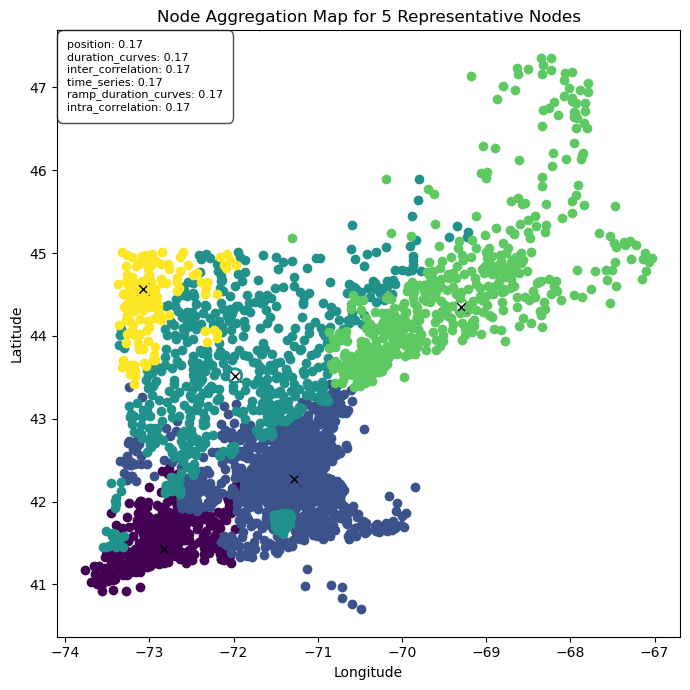

In [15]:
visualizer.plot_spatial_clusters(assignment_dict);

In [16]:
visualizer.plot_data(processor)

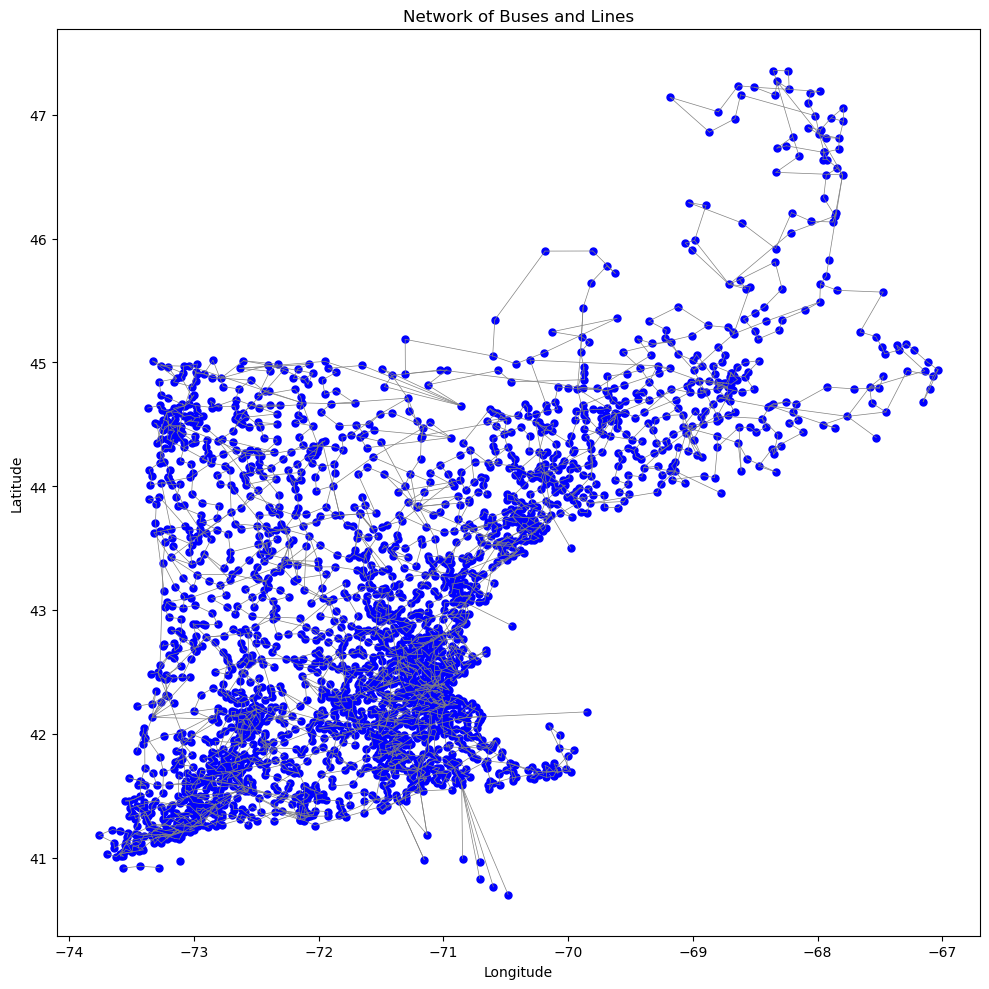

In [17]:
visualizer.plot_network();